<a href="https://colab.research.google.com/github/rahul-727/DL-Lab-work/blob/main/2348544_Lab_9_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
dataframe = pd.read_csv(url, usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normalize the dataset

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets

In [7]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(f'Train size: {train_size}, Test size: {test_size}')

Train size: 96, Test size: 48


In [8]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# LSTM Model

In [10]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0625 - 2s/epoch - 23ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0326 - 168ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0237 - 211ms/epoch - 2ms/step
Epoch 4/100
94/94 - 1s - loss: 0.0211 - 624ms/epoch - 7ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0197 - 279ms/epoch - 3ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0187 - 308ms/epoch - 3ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0178 - 291ms/epoch - 3ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0168 - 297ms/epoch - 3ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0159 - 301ms/epoch - 3ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0149 - 232ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0142 - 194ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0132 - 174ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0126 - 173ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0116 - 184ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0108 - 192ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0101 - 178ms/epoc

 # Make Predictions

In [11]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print(f'Train Score: {trainScore:.2f} RMSE')
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print(f'Test Score: {testScore:.2f} RMSE')

2/2 [==============================] - 0s 5ms/step
Train Score: 22.84 RMSE
Test Score: 50.10 RMSE


lower RMSE values indicating better performance.
model has a better fit on the training data compared to the test data,

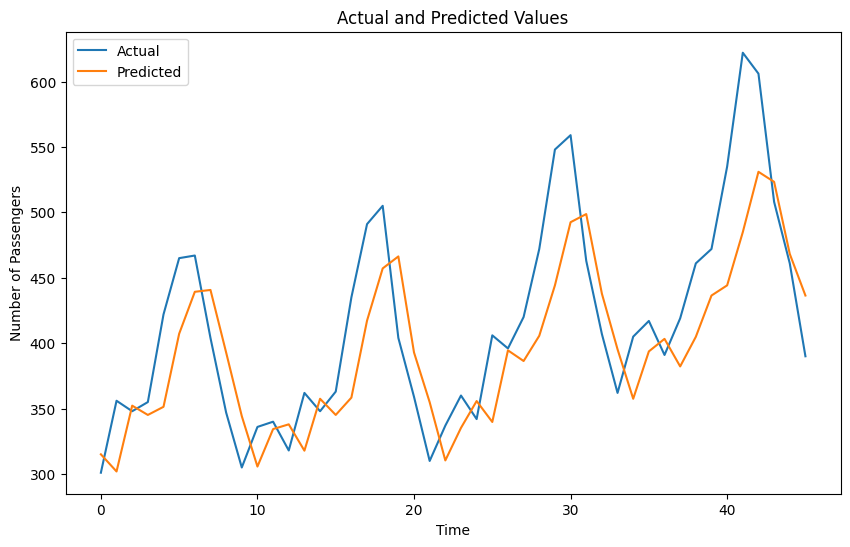

In [12]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(dataset)[len(trainPredict)+(look_back*2)+1:len(dataset)-1], label='Actual')
plt.plot(testPredict, label='Predicted')
plt.title('Actual and Predicted Values')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()